**Classification with SVM || Dataset: captura pcap**

**Import modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


**Load dataset**

In [3]:
# Load training data
filename1 = 'captura.csv'
#filename1 = 'bank-additional-full.csv'
bank_df = pd.read_csv(filename1, delimiter=';', header=0)
bank_df.head()

,No.,Time,Source,Destination,Protocol,Length
0,1,0.000000,Alcatel-_19:39:41,Spanning-tree-(for-bridges)_00,STP,60
1,2,0.130454,68.55.0.1,224.9.9.4,UDP,783
2,3,0.147551,192.168.168.1,192.168.168.1,ICMP,110
3,4,0.147606,132.32.128.200,132.32.128.200,ICMP,103
4,5,0.374202,172.31.48.1,255.255.255.255,DHCP,367


In [4]:
bank_df.dtypes

No.             int64
Time           object
Source         object
Destination    object
Protocol       object
Length          int64
dtype: object

In [5]:
bank_df[bank_df.isnull().any(axis=1)]

,No.,Time,Source,Destination,Protocol,Length



**Data preprocessing**

### Input variables:

Bank client data:

1. age (numeric)
   
2. job: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: "cellular","telephone")

9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: "yes","no")

In [6]:

catCols = [col for col in bank_df.columns if bank_df[col].dtype=="O"]
print(catCols)

lb_make = LabelEncoder()

for item in catCols:
    bank_df[item] = lb_make.fit_transform(bank_df[item])

print(bank_df)

['Time', 'Source', 'Destination', 'Protocol']
    No.  Time  Source  Destination  Protocol  Length
0     1     0      22            7         5      60
1     2     1       4            3         6     783
2     3     2       2            1         2     110
3     4     3       0            0         2     103
4     5     5       1            4         1     367
5     6     4       1            4         1     357
6     7     6      23            5         0      42
7     8     7      19            3         6     166
8     9     9      17            3         6     166
9    10     8      24            5         0      42
10   11    10      16            3         6     198
11   12    12      24            5         0      42
12   13    11      11            3         6     166
13   14    13      23            5         0      42
14   15    14      18            3         6     166
15   16    15      22            6         3     179
16   17    16       9            3         6     804


In [7]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(bank_df)
bank_df = pd.DataFrame(x_scaled)

In [8]:
train_df, test_df = train_test_split(bank_df, test_size=0.2)
print(train_df)
print(test_df)

           0         1         2         3         4         5
26  0.590909  0.568182  0.500000  0.428571  1.000000  0.162730
16  0.363636  0.363636  0.375000  0.428571  1.000000  1.000000
32  0.727273  0.727273  0.208333  0.428571  1.000000  0.162730
31  0.704545  0.704545  0.291667  0.428571  1.000000  1.000000
40  0.909091  0.909091  0.958333  0.714286  0.000000  0.000000
30  0.681818  0.636364  0.666667  0.428571  1.000000  0.216535
39  0.886364  0.886364  0.166667  0.428571  1.000000  0.972441
4   0.090909  0.113636  0.041667  0.571429  0.166667  0.426509
17  0.386364  0.386364  0.833333  0.428571  1.000000  0.162730
14  0.318182  0.318182  0.750000  0.428571  1.000000  0.162730
18  0.409091  0.431818  0.125000  0.285714  0.666667  0.065617
29  0.659091  0.659091  0.125000  0.285714  0.666667  0.052493
15  0.340909  0.340909  0.916667  0.857143  0.500000  0.179790
38  0.863636  0.863636  0.541667  0.428571  1.000000  0.162730
11  0.250000  0.272727  1.000000  0.714286  0.000000  0


** Cross validation Using k-fold CV**

K-fold ---------------------------------------------------------------
Model accuracy: 1.0


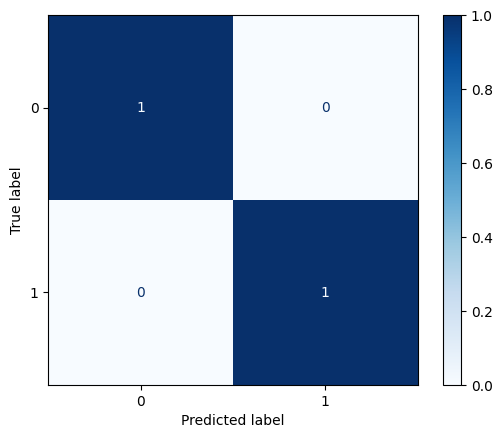

Confusion matrix:
 [[2 0]
 [0 7]]
Percentage classification error obtained from validation set: 0.0%
K-fold ---------------------------------------------------------------
Model accuracy: 0.8888888888888888


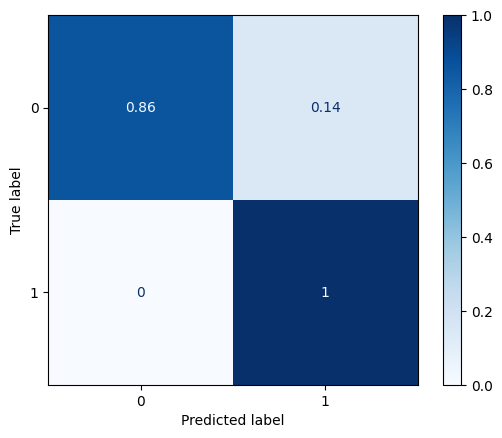

Confusion matrix:
 [[6 1]
 [0 2]]
Percentage classification error obtained from validation set: 11.11111111111111%
K-fold ---------------------------------------------------------------
Model accuracy: 1.0


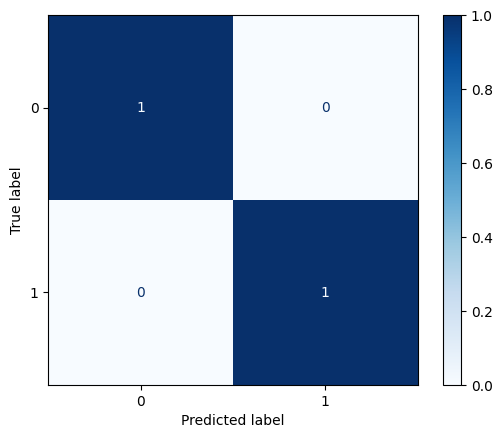

Confusion matrix:
 [[4 0]
 [0 5]]
Percentage classification error obtained from validation set: 0.0%
K-fold ---------------------------------------------------------------
Model accuracy: 0.8888888888888888


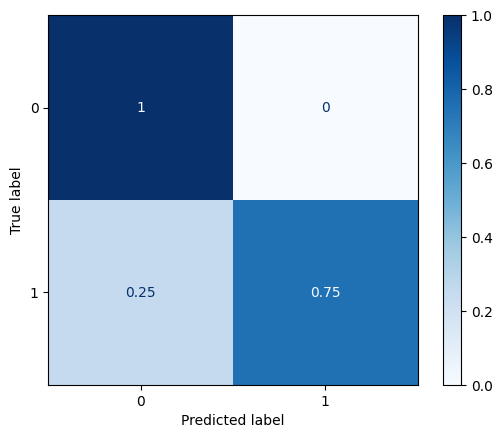

Confusion matrix:
 [[5 0]
 [1 3]]
Percentage classification error obtained from validation set: 11.11111111111111%
Mean percentage classification error obtained from cross validation: 5.555555555555555%


In [11]:
X_train = train_df.iloc[:,0:4].to_numpy()
y_train = train_df.iloc[:,4].astype(int).to_numpy()

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('K-fold ---------------------------------------------------------------')

    # Create the SVM estimator
    clf = SVC(kernel='rbf', random_state=0)

    # Train the model using the training set
    clf.fit(X_train[train], y_train[train])

    # Generate predictions
    y_pred = clf.predict(X_train[validation])

    # Evaluate by means of accuracy
    accuracy = accuracy_score(y_train[validation], y_pred)
    print(f'Model accuracy: {accuracy}')

    # Evaluate by means of a confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                   labels=clf.classes_,
                                                   display_labels=clf.classes_,
                                                   cmap=plt.cm.Blues,
                                                   normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    # Calculate the percentage classification error obtained from validation test
    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')

    cv_percentage_classification_errors.append(percentage_classification_error)

# Calculate the mean percentage classification error obtained from cross-validation
print(f'Mean percentage classification error obtained from cross validation: {np.mean(cv_percentage_classification_errors)}%')


 **Training**

In [12]:
# Create the SVM estimator
clf = SVC(kernel='rbf', random_state=0)
print('Names and current values for all parameters for the estimator: ', clf.get_params())

# Train the model using 'all' the training set
clf.fit(X_train, y_train)

Names and current values for all parameters for the estimator:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


SVC(random_state=0)


**Test**

Model accuracy: 1.0


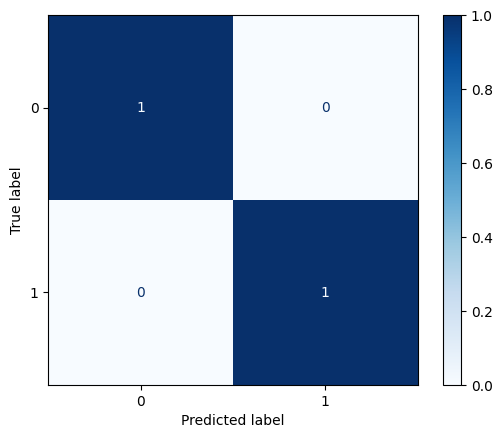

Confusion matrix:
 [[6 0]
 [0 3]]
Percentage classification error obtained from test set: 0.0%


In [14]:
X_test = test_df.iloc[:,0:4].to_numpy()
y_test = test_df.iloc[:,4].astype(int).to_numpy()

# Generate predictions
y_pred = clf.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                               labels=clf.classes_,
                                               display_labels=clf.classes_,
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [18]:
bank_svm_results = { 'real_value': y_test,
                    'prediction': y_pred}

df = pd.DataFrame(bank_svm_results)

df.to_csv('captura_svm_results.csv')